In [1]:
!pip install pandas mlxtend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('Online retail.csv',header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [11]:
df[0].value_counts()

cookies                                                                                                                                                                     223
french fries                                                                                                                                                                132
escalope                                                                                                                                                                    101
mineral water                                                                                                                                                                93
eggs                                                                                                                                                                         90
                                                                                                                        

In [12]:
df[0].value_counts().head(40)

cookies                   223
french fries              132
escalope                  101
mineral water              93
eggs                       90
chocolate                  73
green tea                  72
spaghetti                  52
champagne                  45
low fat yogurt             45
pancakes                   39
milk                       33
cake                       29
muffins                    27
yogurt cake                25
olive oil                  23
candy bars                 23
energy bar                 22
grated cheese              21
herb & pepper              21
ground beef                21
eggs,french fries          21
cake,french fries          20
burgers                    20
frozen smoothie            20
hot dogs                   20
tomatoes                   19
frozen vegetables          19
whole wheat rice           18
chocolate,french fries     18
brownies                   18
energy drink               17
turkey,eggs                16
strawberri

<Axes: >

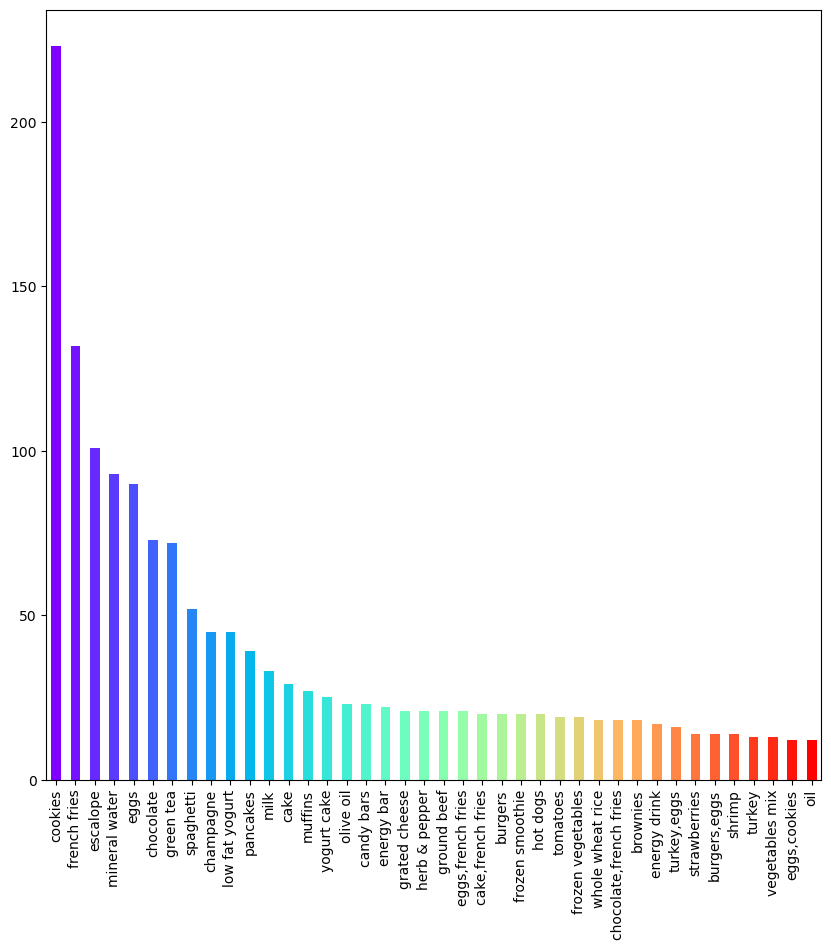

In [13]:
plt.figure(figsize=(10,10))
color= plt.cm.rainbow(np.linspace(0,1,40))#x range 0 to 1 and there are 40 splits in the graph
df[0].value_counts().head(40).plot(kind='bar',color=color)

In [14]:
transactions=[]
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in df.columns])

In [15]:
transactions[0]

['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil']

In [16]:
items1= [items for trans in transactions for items in trans]

In [17]:
items2=list(set(items1))

In [18]:
len(items2)

5176

In [19]:
if 'nan' in items2: items2.remove('nan')

In [20]:
len(items2)

5176

In [21]:
print(items2)

['chocolate,soup,avocado,chicken,cookies,light mayo,green tea', 'turkey,grated cheese,herb & pepper,tomato sauce,spaghetti,black tea,salmon,eggs,rice', 'mineral water,antioxydant juice', 'pancakes,light mayo', 'grated cheese,pepper,pancakes,cake,french fries,green tea', 'chocolate,champagne,green tea', 'burgers,dessert wine,strong cheese,french fries', 'burgers,chocolate,frozen vegetables,ground beef,mineral water,milk,light mayo,asparagus', 'grated cheese,spaghetti,mint', 'mashed potato', 'shrimp,whole wheat pasta,meatballs,milk', 'frozen vegetables,whole wheat rice', 'yams,cake', 'burgers,grated cheese,spaghetti,avocado,milk,oil,french fries', 'butter,pancakes,eggs,frozen smoothie,low fat yogurt', 'mineral water,cake,burger sauce', 'fresh tuna,chocolate,shrimp,frozen vegetables,milk,olive oil,pancakes', 'chocolate,spaghetti,mineral water,chicken,tomato juice', 'chili', 'chocolate,ground beef,pepper,spaghetti,salmon,body spray', 'spaghetti,mineral water,meatballs,cooking oil', 'gums,e

In [22]:
enc= TransactionEncoder().fit(transactions)

In [23]:
one_hot= enc.transform(transactions)

In [25]:
data=pd.DataFrame(one_hot,columns=enc.columns_)

In [26]:
data

,almonds,"almonds,cake,low fat yogurt","almonds,cookies","almonds,eggs","almonds,eggs,cookies","almonds,eggs,cooking oil,french fries,green tea","almonds,eggs,yogurt cake","almonds,french wine","almonds,french wine,green tea,french fries,escalope,strawberries,tomato juice,honey","almonds,pancakes,eggs,chocolate,french fries,mint",...,"yams,mineral water,energy bar,eggs,fresh bread","yams,mineral water,french fries","yams,mineral water,soup,milk,pancakes,whole wheat rice,barbecue sauce,carrots,chocolate,champagne","yams,mint",yogurt cake,"yogurt cake,candy bars","yogurt cake,energy drink","yogurt cake,honey","yogurt cake,low fat yogurt","yogurt cake,mint"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
freq_patterns= apriori(data,min_support=0.0004, use_colnames=True)

In [51]:
freq_patterns

,support,itemsets
0,0.000933,(antioxydant juice)
1,0.000933,(avocado)
2,0.000533,(babies food)
3,0.002400,(brownies)
4,0.002666,(burgers)
...,...,...
131,0.000933,(white wine)
132,0.000933,(whole wheat pasta)
133,0.002400,(whole wheat rice)
134,0.001067,(yams)


In [52]:
association_rules(freq_patterns,metric='confidence',min_threshold=0.1,num_itemsets='int')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


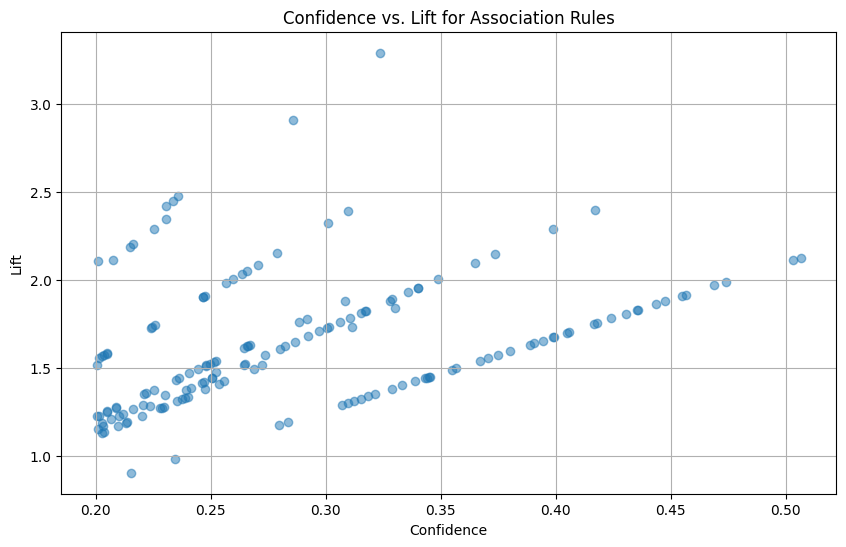

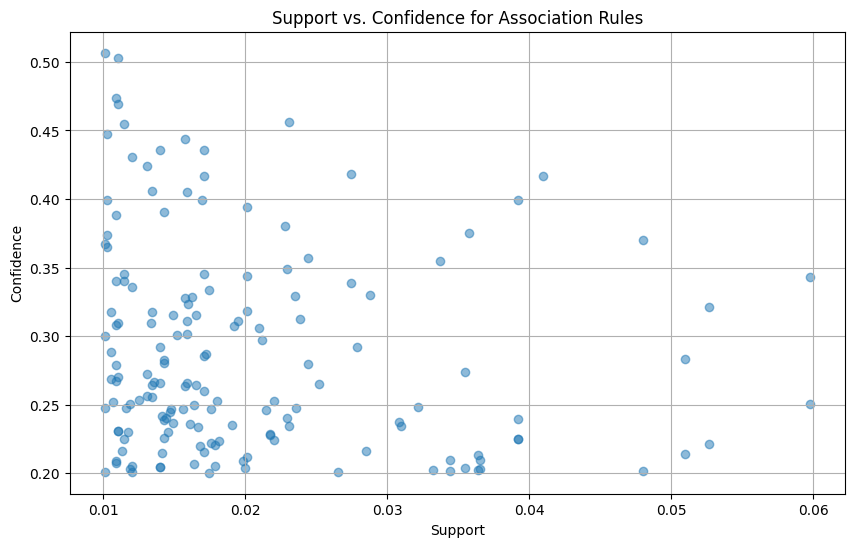

In [17]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
# You can adjust the plot based on what you want to visualize

# Example: Plotting confidence vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift for Association Rules')
plt.grid(True)
plt.show()

# Example: Plotting support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()

### ASSOCIATION RULES
##### The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.
### Dataset:
##### Use the Online retail dataset to apply the association rules.
### Data Preprocessing:
##### Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.
### Association Rule Mining:
##### Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
##### Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
##### Set appropriate threshold for support, confidence and lift to extract meaning full rules. Analysis and Interpretation:
##### Analyse the generated rules to identify interesting patterns and relationships between the products.
##### Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


- Lift in Association Rules
Lift is a measure of how much more likely two items are to appear together compared to if they were independent. It helps determine the strength of an association rule. A lift value greater than 1 indicates a positive association, meaning the presence of one item increases the likelihood of the other appearing. Conversely, a lift value less than 1 suggests a negative association.

- Support and Confidence
- Support: This measures how frequently an itemset appears in the dataset. It is calculated as:
[ \text{Support} = \frac{\text{Number of transactions containing the itemset}}{\text{Total number of transactions}} ]
- Confidence: This indicates the reliability of an association rule. It is calculated as:
[ \text{Confidence} = \frac{\text{Number of transactions containing both antecedent and consequent}}{\text{Number of transactions containing the antecedent}} ] These metrics help filter out weak rules and focus on meaningful associations.

  
- Limitations and Challenges of Association Rule Mining
- Scalability: Processing large datasets can be computationally expensive.
- Redundant Rules: Many rules may be generated, making it difficult to identify the most useful ones.
- Low Support for Rare Items: Items that appear infrequently may not be captured, even if they have strong associations.
- Interpretability: Some rules may be statistically significant but lack practical relevance.

